In [1]:
import numpy as np
from math import exp
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

bin_separators = [16/(2**i) for i in range(0, 9)][::-1]

def createBins(data, bin_sep, normalize=True):
    nonzero_bins, freq = np.unique(np.digitize(data, bin_separators), return_counts=True)
    result = []
    for bin_number in range(len(bin_sep)+1):
        if bin_number in nonzero_bins:
            index = np.where(bin_number==nonzero_bins)[0]
            result.append(freq[index][0])
        else: result.append(0)
    if normalize:
        result /= sum(result)
    return result

In [2]:

X_train, y_train = [], [] 
X_test, y_test = [], []
for i in range(100):
    a = np.random.uniform(0,20, 20)
    X_train.append(createBins(a, bin_separators))
    y_train.append(0)
    
for i in range(100):
    a = np.random.normal(5,10, 20)
    X_train.append(createBins(a, bin_separators))
    y_train.append(1)
    
for i in range(10):
    a = np.random.uniform(0,20, 20)
    X_test.append(createBins(a, bin_separators))
    y_test.append(0)
    
for i in range(10):
    a = np.random.normal(5,10, 20)
    X_test.append(createBins(a, bin_separators))
    y_test.append(1)

In [3]:
dtc = DecisionTreeClassifier()
lgr = LogisticRegression()
dtc.fit(X_train, y_train)


DecisionTreeClassifier()

In [4]:
dtc.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

[Text(167.4, 195.696, 'X[0] <= 0.075\ngini = 0.5\nsamples = 200\nvalue = [100, 100]'),
 Text(111.60000000000001, 152.208, 'X[7] <= 0.275\ngini = 0.02\nsamples = 101\nvalue = [100, 1]'),
 Text(55.800000000000004, 108.72, 'gini = 0.0\nsamples = 89\nvalue = [89, 0]'),
 Text(167.4, 108.72, 'X[0] <= 0.025\ngini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(111.60000000000001, 65.232, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(223.20000000000002, 65.232, 'X[9] <= 0.15\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(167.4, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(279.0, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 152.208, 'gini = 0.0\nsamples = 99\nvalue = [0, 99]')]

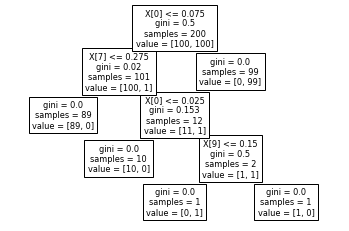

In [5]:
plot_tree(dtc)